In [55]:
!pip install h5py

In [56]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.layers import *
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential, Model
from keras.optimizers import Adam

In [57]:
(X_Train,_),(_,_) = mnist.load_data()

In [58]:
print(X_Train.shape)

(60000, 28, 28)


In [59]:
#Normalize
x_train = (X_Train.astype('float32')-127.5)/127.5
print(np.min(x_train))
print(np.max(x_train))

-1.0
1.0


In [60]:
x_train = x_train.reshape(-1,28*28)
print(x_train.shape)

(60000, 784)


In [61]:
epochs = 60
batch_size = 256
no_of_batches = int(x_train.shape[0]/batch_size)
half_batch_size = 128
noise_dim = 100
adam = Adam(lr = 2e-4,beta_1=0.5)

In [62]:
#Generator
generator = Sequential()
generator.add(Dense(256,input_shape=(noise_dim,)))
generator.add(LeakyReLU(0.2))

generator.add(Dense(512))
generator.add(LeakyReLU(0.2))

generator.add(Dense(1024))
generator.add(LeakyReLU(0.2))

generator.add(Dense(784,activation = 'tanh'))

#Compile
generator.compile(loss = 'binary_crossentropy',optimizer = adam)
generator.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_18 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_19 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_20 (LeakyReLU)   (None, 1024)              0         
_________________________________________________________________
dense_27 (Dense)             (None, 784)             

In [63]:
#Discriminator
discriminator = Sequential()
discriminator.add(Dense(512,input_shape=(784,)))
discriminator.add(LeakyReLU(0.2))

discriminator.add(Dense(256))
discriminator.add(LeakyReLU(0.2))

discriminator.add(Dense(1,activation = 'sigmoid'))

discriminator.compile(loss='binary_crossentropy',optimizer='adam')
discriminator.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 512)               401920    
_________________________________________________________________
leaky_re_lu_21 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_22 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 257       
Total params: 533,505
Trainable params: 533,505
Non-trainable params: 0
_________________________________________________________________


In [64]:
#Combined Generator and Discriminator

discriminator.trainable = False
gan_input = Input(shape=(noise_dim,))
generator_outupt = generator(gan_input)
gan_output = discriminator(generator_outupt)

model = Model(input=gan_input,output=gan_output)
model.compile(loss='binary_crossentropy',optimizer=adam)

model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 100)               0         
_________________________________________________________________
sequential_10 (Sequential)   (None, 784)               1486352   
_________________________________________________________________
sequential_11 (Sequential)   (None, 1)                 533505    
Total params: 2,019,857
Trainable params: 1,486,352
Non-trainable params: 533,505
_________________________________________________________________


c:\users\monkey d. appl3\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("se...)`
  


In [65]:
#noise = np.random.normal(0,1,size = (half_batch_size,noise_dim))
#print(noise.shape)

In [66]:
def showImgs(epoch):
    noise = np.random.normal(0,1,size=(100,noise_dim))
    generated_imgs = generator.predict(noise)
    generated_imgs = generated_imgs.reshape(-1,28,28)
    
    #Display Images
    plt.figure(figsize = (10,10))
    for i in range(100):
        plt.subplot(10,10,i+1)
        plt.imshow(generated_imgs[i],cmap='gray',interpolation='nearest')
        plt.axis('off')
        
    plt.tight_layout()
    plt.savefig("images/gan_output_epoch_{0}.png".format(epoch+1))
    plt.show()

Epoch 1 D Loss 283.6465 G Loss 394.1429 


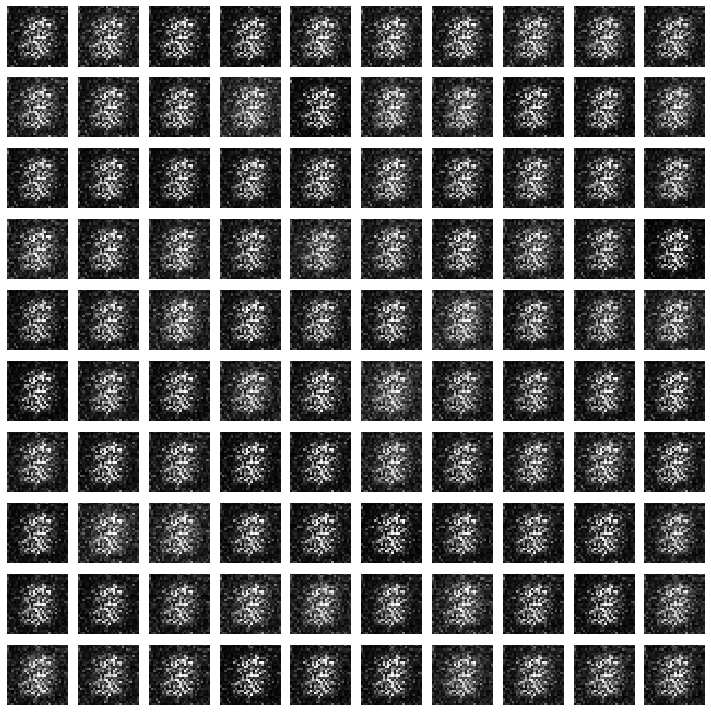

Epoch 2 D Loss 270.2677 G Loss 259.5921 
Epoch 3 D Loss 203.0102 G Loss 218.7817 
Epoch 4 D Loss 163.2847 G Loss 285.0900 
Epoch 5 D Loss 164.9093 G Loss 296.6693 
Epoch 6 D Loss 144.1663 G Loss 329.7938 


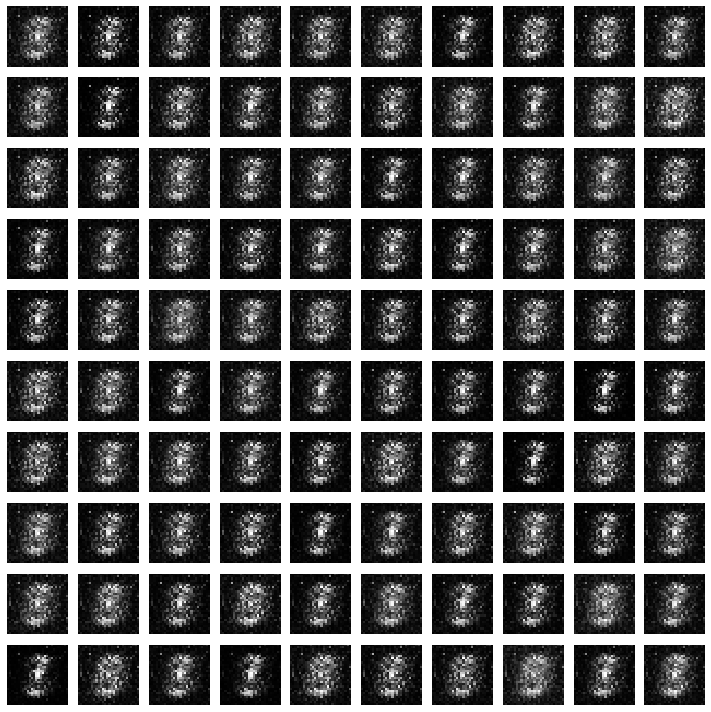

Epoch 7 D Loss 155.2093 G Loss 289.2948 
Epoch 8 D Loss 169.6902 G Loss 362.4572 
Epoch 9 D Loss 153.3248 G Loss 300.7045 
Epoch 10 D Loss 143.2090 G Loss 366.6950 
Epoch 11 D Loss 131.7592 G Loss 347.5314 


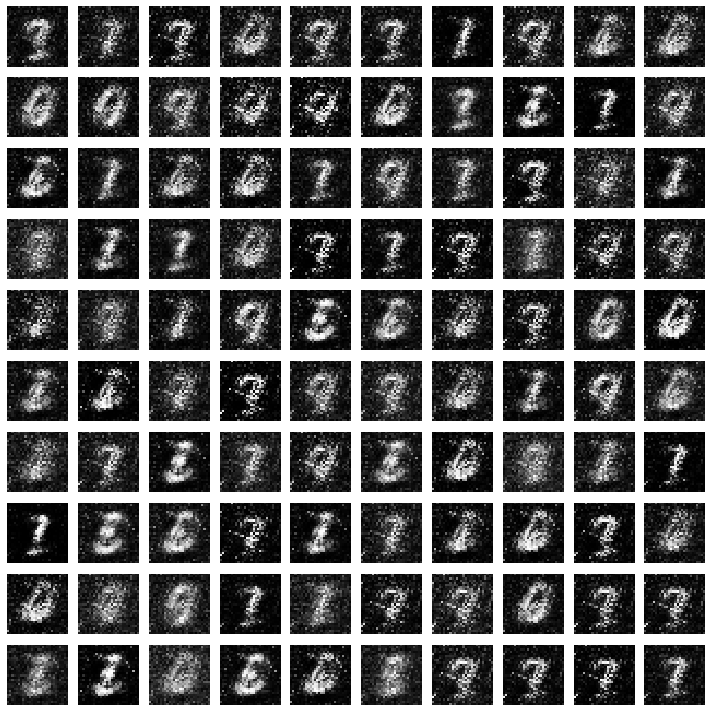

Epoch 12 D Loss 143.5076 G Loss 323.6448 
Epoch 13 D Loss 143.2186 G Loss 339.8487 
Epoch 14 D Loss 140.8200 G Loss 330.8651 
Epoch 15 D Loss 139.4405 G Loss 335.9314 
Epoch 16 D Loss 167.5691 G Loss 412.0539 


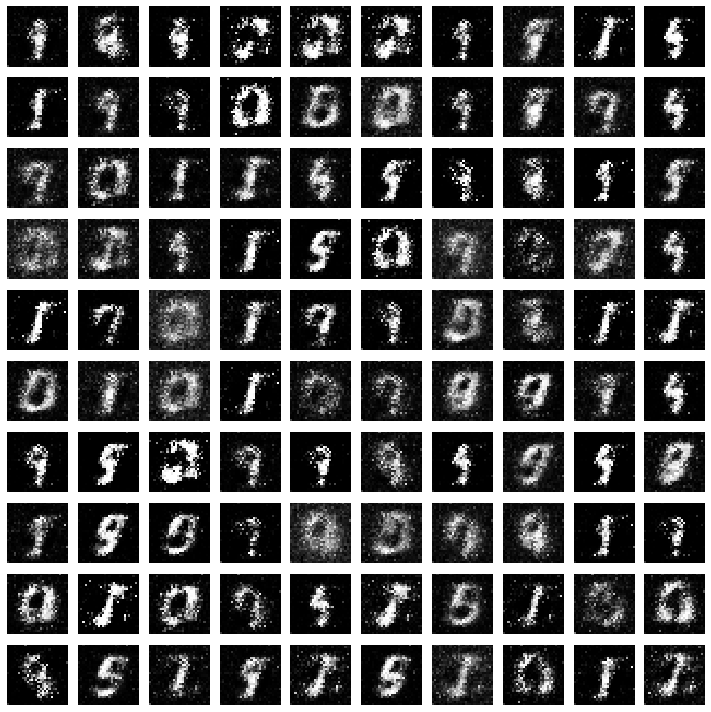

Epoch 17 D Loss 128.1912 G Loss 383.5941 
Epoch 18 D Loss 142.6706 G Loss 396.7129 
Epoch 19 D Loss 131.6446 G Loss 386.2554 
Epoch 20 D Loss 134.3630 G Loss 390.1545 
Epoch 21 D Loss 135.3621 G Loss 400.9493 


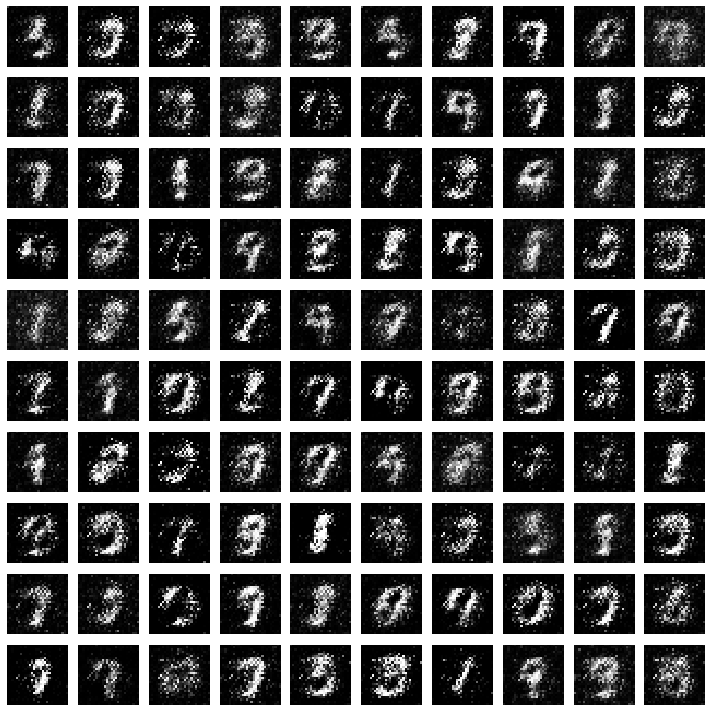

Epoch 22 D Loss 154.8099 G Loss 358.1067 
Epoch 23 D Loss 121.4963 G Loss 392.2775 
Epoch 24 D Loss 125.6266 G Loss 404.4355 
Epoch 25 D Loss 127.2857 G Loss 416.8706 
Epoch 26 D Loss 126.6922 G Loss 429.1919 


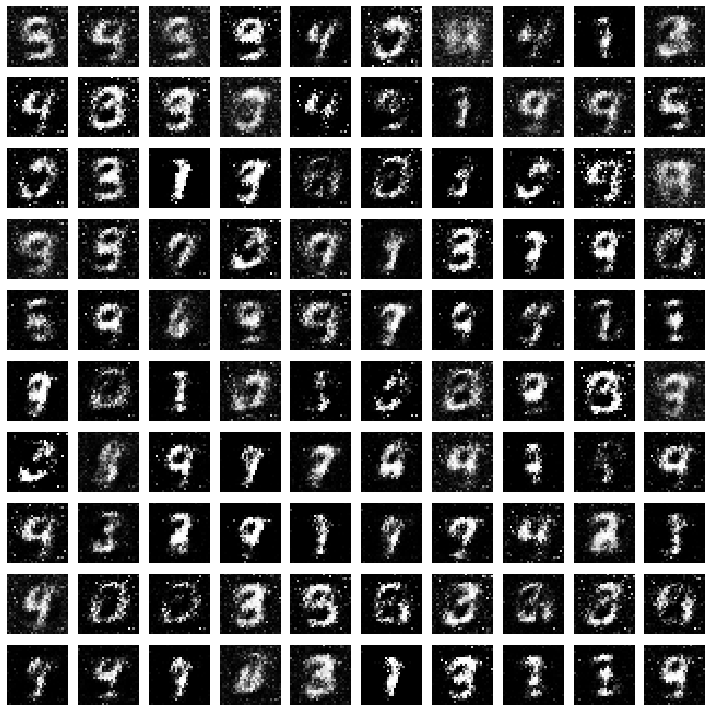

Epoch 27 D Loss 124.8162 G Loss 421.5498 
Epoch 28 D Loss 127.6502 G Loss 374.2346 
Epoch 29 D Loss 128.3397 G Loss 373.0383 
Epoch 30 D Loss 134.5866 G Loss 376.0894 
Epoch 31 D Loss 133.6032 G Loss 353.4331 


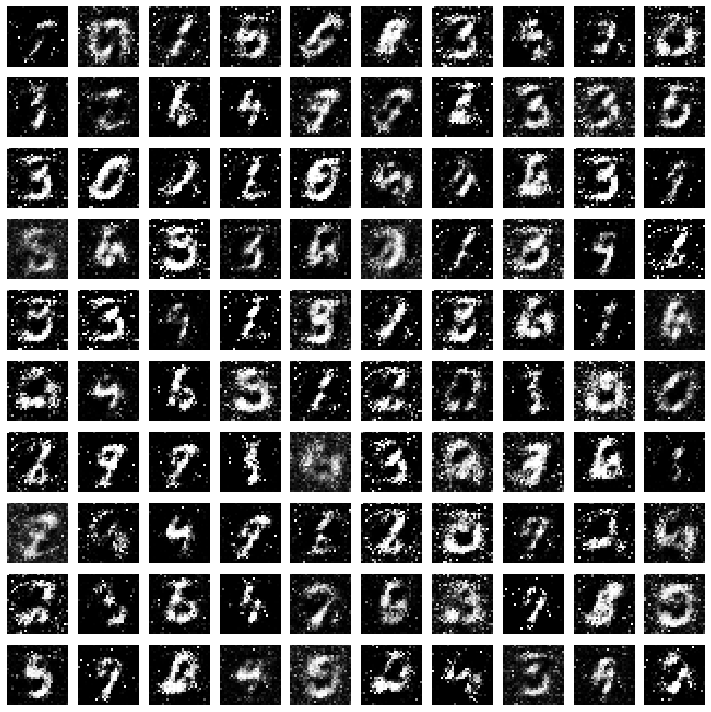

Epoch 32 D Loss 129.9225 G Loss 352.8858 
Epoch 33 D Loss 129.9838 G Loss 368.7676 
Epoch 34 D Loss 136.6696 G Loss 341.9215 
Epoch 35 D Loss 136.8338 G Loss 333.3871 
Epoch 36 D Loss 140.5067 G Loss 312.7217 


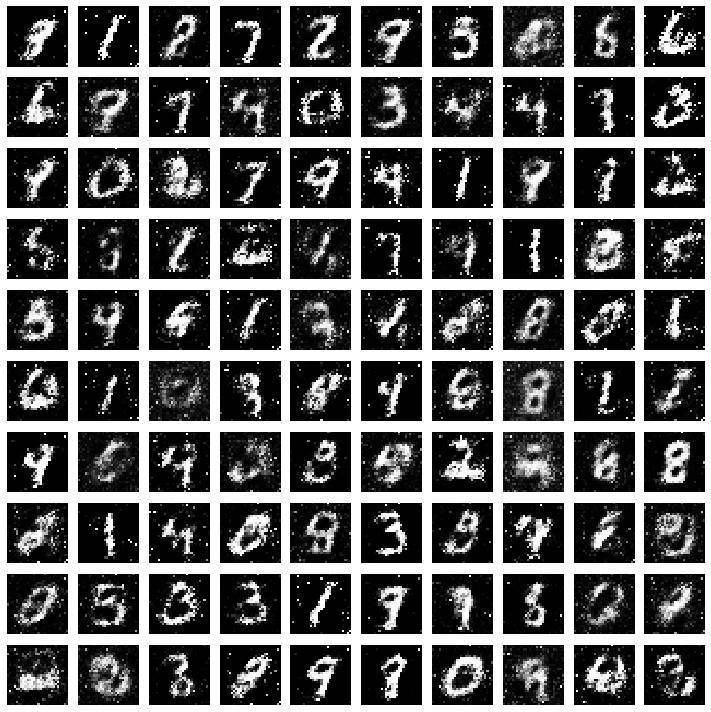

Epoch 37 D Loss 141.0479 G Loss 303.1570 
Epoch 38 D Loss 140.6063 G Loss 301.1908 
Epoch 39 D Loss 141.7700 G Loss 297.9590 
Epoch 40 D Loss 141.5743 G Loss 301.3368 
Epoch 41 D Loss 143.2033 G Loss 295.1059 


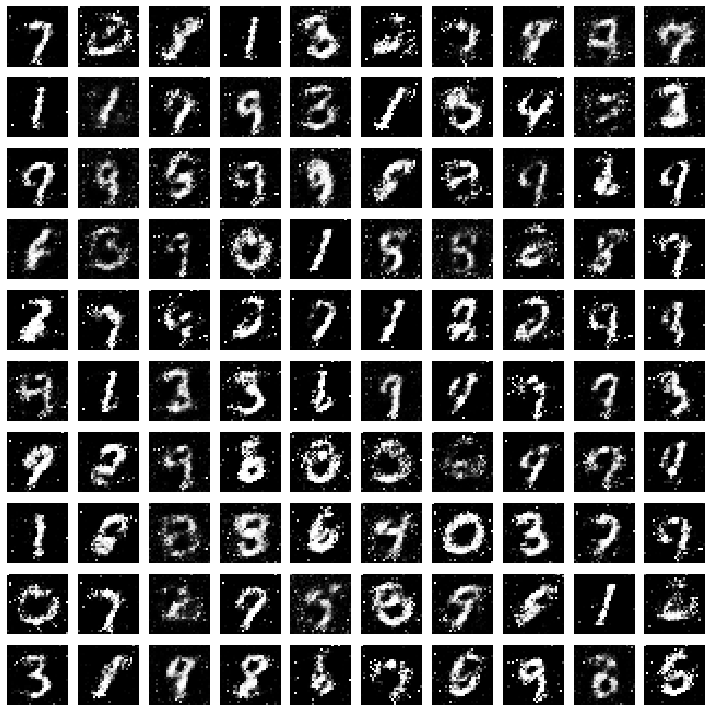

Epoch 42 D Loss 143.5162 G Loss 291.6927 
Epoch 43 D Loss 144.3730 G Loss 288.1034 
Epoch 44 D Loss 147.8429 G Loss 277.2457 
Epoch 45 D Loss 149.4095 G Loss 267.2468 
Epoch 46 D Loss 149.8079 G Loss 263.1885 


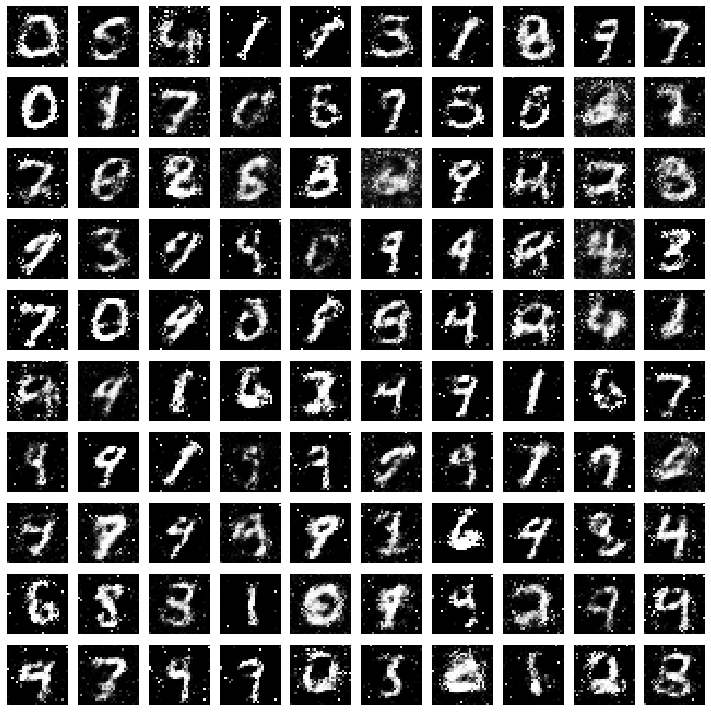

Epoch 47 D Loss 150.4202 G Loss 260.9362 
Epoch 48 D Loss 151.4539 G Loss 257.2182 
Epoch 49 D Loss 153.2134 G Loss 254.7400 
Epoch 50 D Loss 153.7201 G Loss 248.6394 
Epoch 51 D Loss 154.7433 G Loss 247.9740 


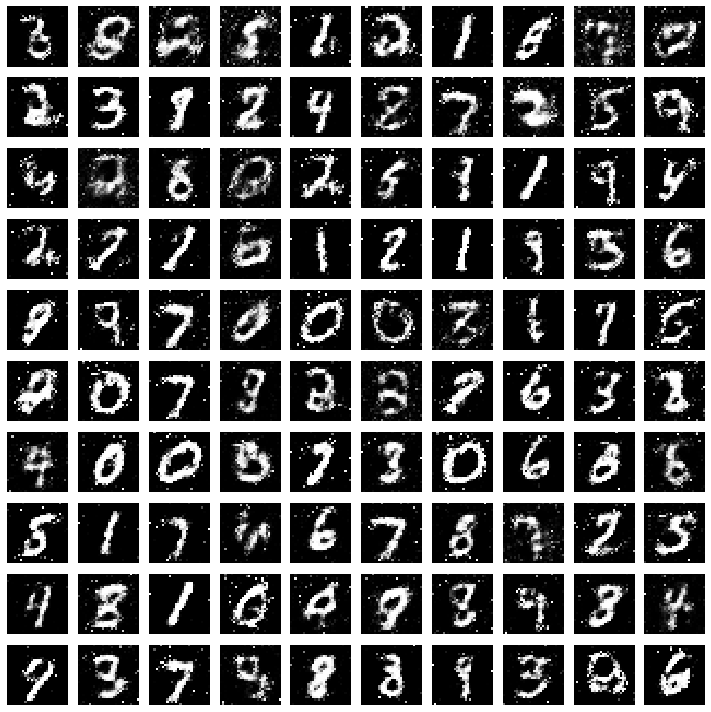

Epoch 52 D Loss 154.6483 G Loss 243.6339 
Epoch 53 D Loss 154.8623 G Loss 244.3265 
Epoch 54 D Loss 155.7435 G Loss 241.0058 
Epoch 55 D Loss 156.2337 G Loss 238.2843 
Epoch 56 D Loss 157.4689 G Loss 240.5143 


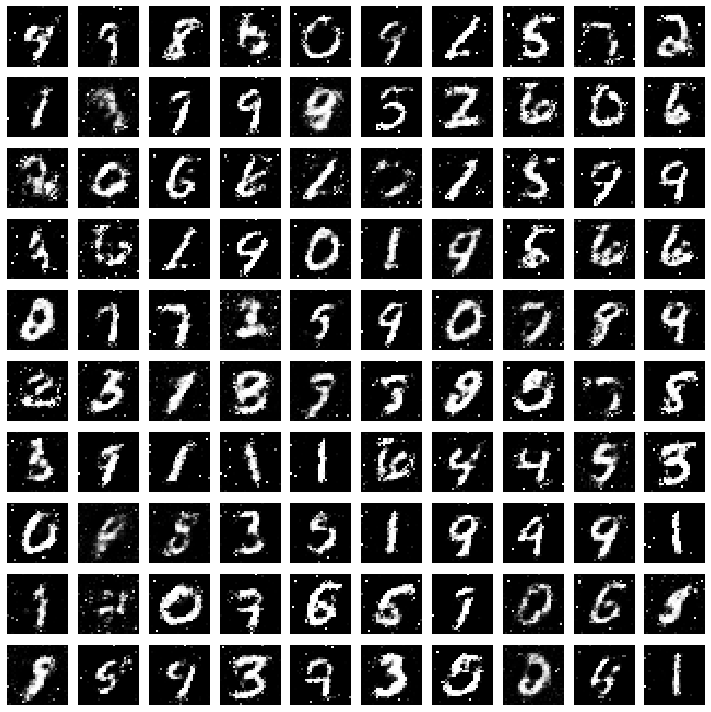

Epoch 57 D Loss 156.0742 G Loss 236.3976 


In [ ]:
d_losses = []
g_losses = []

#Training in Loop
for epoch in range(epochs):
    epoch_d_loss = 0.0
    epoch_g_loss = 0.0
    
    #Mini Batch
    
    for step in range(no_of_batches):
        idx = np.random.randint(0,x_train.shape[0],half_batch_size)
        real_imgs = x_train[idx]
        
        #generate fake images assuming discriminator is frozen
        noise = np.random.normal(0,1,size = (half_batch_size,noise_dim))
        fake_imgs = generator.predict(noise)
        
        #Labels
        real_y = np.ones((half_batch_size,1))*0.9
        fake_y = np.zeros((half_batch_size,1))
        
        #train fake and real images
        
        d_real_loss = discriminator.train_on_batch(real_imgs,real_y)
        d_fake_loss = discriminator.train_on_batch(fake_imgs,fake_y)
        
        d_loss = 0.5*d_real_loss + 0.5*d_fake_loss
        epoch_d_loss += d_loss
        
        #Train Generator
        noise = np.random.normal(0,1,size = (batch_size,noise_dim))
        real_y = np.ones((batch_size,1))
        g_loss = model.train_on_batch(noise,real_y)
        epoch_g_loss += g_loss
    
    d_losses.append(epoch_d_loss)
    g_losses.append(epoch_g_loss)
    
    print("Epoch %d D Loss %.4f G Loss %.4f "%((epoch+1),epoch_d_loss,epoch_g_loss))
    if(epoch%5) == 0:
        generator.save('model/gan_generator_{0}.h5'.format(epoch+1))
        showImgs(epoch)